In [59]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from tqdm import tqdm

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [60]:
MAIN_DIR = './STATUS_TTA_INFERENCE'
folder_names = os.listdir(MAIN_DIR)
test = pd.read_csv('C:/Users/Smartinside/Downloads/11.한국전력공사_데이터/test_output_sample.csv')
print(folder_names)
print(len(folder_names))

['cv_0.87839_efficientnet_b4', 'cv_0.89610_tf_efficientnetv2_b3', 'cv_0.89965_efficientnet_b3', 'cv_0.90000_resnext50_32x4d', 'cv_0.90000_vit_base_patch16_384', 'cv_0.90083_efficientv2_s', 'cv_0.90319_efficientnet_b1', 'cv_0.90673_tf_efficientnetv2_s_in21k', 'cv_0.90791_efficientnet_b2', 'cv_0.91000_resnext50_32x4d', 'cv_0.91027_efficientnet_b5_ap', 'cv_0.91263_efficientnetv2_s_in21ft1k', 'cv_0.91499_efficientnet_b6_ap', 'cv_0.92000_tf_efficientnetv2_b3', 'cv_0.92798_efficientnet_b7_ap', 'cv_0.93000_resnext50_32x4d', 'cv_0.93000_seresnext26t_32x4d', 'cv_0.93000_tf_efficientnetv2_b0', 'cv_0.93000_tf_efficientnetv2_b1', 'cv_0.93506_efficientnet_b8_ap', 'cv_0.93506_resnext50_32x4d', 'cv_0.93506_seresnext26d_32x4d', 'cv_0.93506_tf_efficientnetv2_m_in21k', 'cv_0.94000_seresnext26tn_32x4d', 'cv_0.94000_tf_efficientnetv2_b2', 'cv_0.94000_tf_efficientnetv2_s_in21ft1k', 'cv_0.95000_seresnext26d_32x4d', 'cv_0.95000_tf_efficientnetv2_s']
28


In [61]:
pred = 0
weight=1
for i in tqdm(range(26,len(folder_names))):
    model_path = os.path.join(MAIN_DIR, folder_names[i])
    try:
        csv_path = os.path.join(model_path, 'final_preds.csv')
        #print(csv_path)
        model_tta_preds = pd.read_csv(csv_path)
        #display(model_tta_preds)
        pred  = pred + model_tta_preds.values*weight
        weight -= 0.8 
        
    except:
        print('error')
        print(csv_path)
test['status'] = pred.argmax(1)

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 668.41it/s]


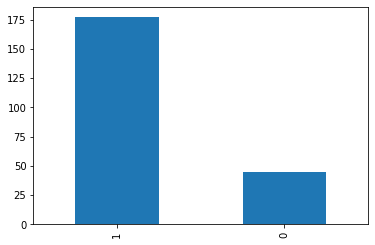

1    177
0     45
Name: status, dtype: int64


In [62]:
# Create df 
submission_status = test.drop(["fault", "type"], axis = 1)
status_nums = test["status"].value_counts()
status_nums.plot.bar()
plt.show()
print(status_nums)

In [63]:
MAIN_DIR = './TYPE_TTA_INFERENCE'
folder_names = os.listdir(MAIN_DIR)
test = pd.read_csv('C:/Users/Smartinside/Downloads/11.한국전력공사_데이터/test_output_sample.csv')
print(folder_names)
print(len(folder_names))

['cv_0.89847_efficientnet_b4', 'cv_0.92000_resnext50_32x4d', 'cv_0.92001_resnext50_32x4d', 'cv_0.92326_efficientnet_b1', 'cv_0.93000_resnext50_32x4d', 'cv_0.93000_vit_base_patch16_224', 'cv_0.93001_resnext50_32x4d', 'cv_0.93152_efficientnet_b3', 'cv_0.93270_tf_efficientnet_b6_ns', 'cv_0.93743_efficientnet_b2', 'cv_0.94000_vit_base_patch16_224_in21k', 'cv_0.95000_tf_efficientnetv2_b0', 'cv_0.95000_tf_efficientnetv2_b1', 'cv_0.95000_tf_efficientnetv2_b2', 'cv_0.95000_tf_efficientnetv2_l_in21k', 'cv_0.95000_tf_efficientnetv2_s_in21k', 'cv_0.95000_vit_base_patch16_384', 'cv_0.95396_tf_efficientnet_b5_ns', 'cv_0.95632_tf_efficientnet_cc_b1_8e', 'cv_0.95868_seresnext26tn_32x4d', 'cv_0.95986_seresnext26d_32x4d', 'cv_0.96000_resnext50_32x4d', 'cv_0.96000_seresnext26d_32x4d', 'cv_0.96000_seresnext26tn_32x4d', 'cv_0.96000_seresnext26t_32x4d', 'cv_0.96000_tf_efficientnetv2_b3', 'cv_0.96000_tf_efficientnet_b3_ns', 'cv_0.96104_seresnext26t_32x4d', 'cv_0.96104_seresnext50_32x4d', 'cv_0.96458_seresne

In [64]:
pred = 0
weight=1
for i in tqdm(range(10,len(folder_names))):
    model_path = os.path.join(MAIN_DIR, folder_names[i])
    try:
        csv_path = os.path.join(model_path, 'final_preds.csv')
        # print(csv_path)
        model_tta_preds = pd.read_csv(csv_path)
        pred  = pred + model_tta_preds.values*weight
        weight += 0

        
    except:
        print('error')
        print(csv_path)

test['type'] = pred.argmax(1)

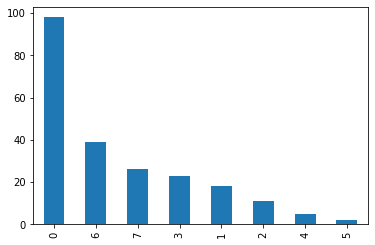

0    98
6    39
7    26
3    23
1    18
2    11
4     5
5     2
Name: type, dtype: int64


In [65]:

# Create df 
submission_type = test.drop(["fault", "status"], axis = 1)
type_nums = test["type"].value_counts()
type_nums.plot.bar()
plt.show()
print(type_nums)

In [66]:
# submission_status = pd.read_csv('./best_status/submission_status.csv')

In [67]:
MAIN_DIR = './FAULT_TTA_INFERENCE'
folder_names = os.listdir(MAIN_DIR)
test = pd.read_csv('C:/Users/Smartinside/Downloads/11.한국전력공사_데이터/test_output_sample.csv')
print(folder_names)
print(len(folder_names))

['cv_0.71900_vit_base_patch16_224', 'cv_0.72373_vit_base_patch16_384', 'cv_0.73200_efficientnet_b5_ap', 'cv_0.73200_efficientnet_b7_ap', 'cv_0.73318_efficientnet_b3', 'cv_0.73672_tf_efficientnetv2_s', 'cv_0.73790_efficientnetv2_rw_s', 'cv_0.74026_efficientnetv2_s_in21ft1k', 'cv_0.74144_efficientnet_es_pruned', 'cv_0.74380_efficientnetv2_s', 'cv_0.75325_efficientnet_b4_ap', 'cv_0.75443_efficientnet_b8_ap', 'cv_0.75561_efficientnetv2_rw_m', 'cv_0.76505_tf_efficientnetv2_m', 'cv_0.76979_resnext50_32x4d', 'cv_0.77450_resnext50', 'cv_0.77900_tf_efficientnetv2_s_in21k', 'cv_0.78000_tf_efficientnetv2_b2', 'cv_0.78300_tf_efficientnetv2_s', 'cv_0.78800_tf_efficientnetv2_b3', 'cv_0.79339_resnext50_32x4d', 'cv_0.79575_resnext50d_32x4d', 'cv_0.79929_resnext50d_32x4d', 'cv_0.79929_resnext50_32x4d']
24


In [68]:
pred = 0
weight=1
for i in tqdm(range(len(folder_names) - 10,len(folder_names))):
    model_path = os.path.join(MAIN_DIR, folder_names[i])
    try:
        csv_path = os.path.join(model_path, 'final_preds.csv')
        # print(csv_path)
        model_tta_preds = pd.read_csv(csv_path)
        pred  = pred + model_tta_preds.values*weight
        weight += 0.2
        
    except:
        print('error')
        print(csv_path)

test['fault'] = pred.argmax(1)

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 323.46it/s]


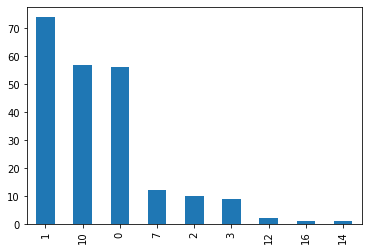

1     74
10    57
0     56
7     12
2     10
3      9
12     2
16     1
14     1
Name: fault, dtype: int64


In [69]:
submission_fault = test.drop(["status", "type"], axis = 1)

fault_nums = test["fault"].value_counts()
fault_nums.plot.bar()
plt.show()
print(fault_nums)

In [70]:
TRAIN_IMAGE_DIR = "C:/Users/Smartinside/Downloads/11.한국전력공사_데이터/train"
DIR = "C:/Users/Smartinside/Downloads/11.한국전력공사_데이터"

train_df_path = os.path.join(DIR, "train_output.csv")
train_df = pd.read_csv(train_df_path)
display(train_df.head())

# print("Train sample: {}".format(len(train_df)))

,file,status,type,fault
0,1679R341_20200409_OH01_DG06_2_30.JPG,정상,COS,정상
1,1778D551_20200514_OH01_DG06_2_5.JPG,정상,COS,정상
2,1678H971_20200514_OH01_DG06_2_33.JPG,정상,COS,정상
3,1778D521_20200514_OH01_DG06_2_15.JPG,정상,COS,정상
4,1679R341_20200409_OH01_DG06_2_12.JPG,정상,COS,정상


In [71]:
status_label_kr = train_df["status"].unique()
print(status_label_kr)
type_label_kr = train_df["type"].unique()
print(type_label_kr)
fault_label_kr = train_df["fault"].unique()
print(fault_label_kr)

['정상' '불량']
['COS' 'GS' 'LA' 'LP자기재' 'LP폴리머' '전주' '현수애자자기' '현수애자폴리머']
['정상' '부식' '석면노출' '크랙' '아크흔적' '파손' '휴즈링크 석면 노출' '박리' '휴즈링크 석면노출' '홀더불량'
 '설치불량' '균열' '침식' '탄화' '정상차측탈락' '설치불량 (정상)' '불순물' '탈락정상' '탈락' '커버없음'
 '박리 (정상)' '커버탈락' '스프리트핀유실']


In [72]:
def change_label_names(class_ids, label_kr):
    convert_dict = {}
    for num in range(len(class_ids)):
        convert_dict[class_ids[num]] = label_kr[num]
    return convert_dict

In [73]:
class_ids_status = [0,1]
status_convert_dict = change_label_names(class_ids_status, status_label_kr)
submission_status["status"].replace(status_convert_dict, inplace=True)
# submission_status

In [74]:
class_ids_type = []
for i in range(len(type_label_kr)):
    class_ids_type.append(i)
    
type_convert_dict = change_label_names(class_ids_type, type_label_kr)
submission_type["type"].replace(type_convert_dict, inplace=True)
# submission_type

In [75]:
class_ids_fault = []
for i in range(len(fault_label_kr)):
    class_ids_fault.append(i)

In [76]:
fault_convert_dict = change_label_names(class_ids_fault, fault_label_kr)
submission_fault["fault"].replace(fault_convert_dict, inplace=True)
# submission_fault

In [77]:
submission_final = pd.read_csv('C:/Users/Smartinside/Downloads/11.한국전력공사_데이터/test_output_sample.csv')

In [78]:
submission_final['status'] = submission_status['status']
submission_final['type'] = submission_type['type']
submission_final['fault'] = submission_fault['fault']

In [79]:
submission_final

,file,status,type,fault
0,0.jpg,정상,현수애자폴리머,정상
1,1.jpg,불량,현수애자폴리머,설치불량
2,2.jpg,정상,COS,정상
3,3.jpg,불량,LP자기재,정상
4,4.jpg,불량,COS,석면노출
...,...,...,...,...
217,217.jpg,불량,현수애자폴리머,설치불량
218,218.jpg,불량,LP자기재,박리
219,219.jpg,불량,LA,정상차측탈락
220,220.jpg,불량,COS,부식


In [80]:
submission_final.to_csv('./temp/test_output_sample.csv', index=False)

In [81]:
updated_submission = submission_final

In [82]:
changeable_row_idxs = []
for row_idx in range(len(updated_submission)):
    if updated_submission.iloc[row_idx]['fault'] == '정상' and updated_submission.iloc[row_idx]['status'] != '정상':
        # submission_final.iloc[row_idx]['status'] = '정상'
        print(row_idx)
        changeable_row_idxs.append(row_idx)
        updated_submission.loc[row_idx, 'status'] = '정상'
    elif updated_submission.iloc[row_idx]['fault'] == '침식':
        print("fault-침식 to 아크흔적")
        print(row_idx)
        changeable_row_idxs.append(row_idx)
        updated_submission.loc[row_idx]['fault'] = '아크흔적'

3
11
24
52
58
88
fault-침식 to 아크흔적
91
98
108
110
fault-침식 to 아크흔적
118
164
184


In [83]:
updated_submission.to_csv('./temp/updated_test_output_sample.csv', index=False)

# DATA ANALYSIS

In [93]:
for index in range(len(updated_submission)):
    status = updated_submission['status'][index]
    fault = updated_submission['fault'][index]
    if status == '정상' and fault != '정상':
        print('status는 정상 fault는 불량일 경우')
        display(updated_submission[index:index+1])
    if status != '정상' and fault == '정상':
        print('status는 불량 fault는 정상일 경우')
        display(updated_submission[index:index+1])

In [103]:
display(updated_submission['status'].head())

0    정상
1    불량
2    정상
3    정상
4    불량
Name: status, dtype: object